In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('D:\\python\\Titanic_ML\\HIV_ml\\training_data.csv')
train.sample(5)

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
364,365,0,CCTCAGATCACTCTTTGGCAACGACCCCTCGTCACAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.1,275
700,701,1,CCTCAGATCACTCTTTGGCAACGACCCTTAGTCACAATAAAGATAG...,CCYATTAGTCCTATTRACACTGTACCAGTAAAATTAAAGCCAGGAA...,4.9,10
799,800,1,CCTCAGATCACTCTTTGGCARCGACCCCTCGTCACAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.1,171
274,275,0,CCTCAGATCACTCTTTGGCAACGACCCCTAGTCACAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.7,219
508,509,1,CCTCAGATCACTCTTTGGCAACGACCCCTCGTCACAGTAAAAGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.0,350


In [3]:
test=pd.read_csv('D:\\python\\Titanic_ML\\HIV_ml\\test_data.csv')

In [4]:
test.sample(5)


,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
171,172,H,ACTCTTTGGCAACGACCCCTTGTCACAATAAAGATAGGGGGGCAAA...,NTTTGYACAGAAATGGAGAAGGAAGGGAAAATTTCAAAAATTGGGC...,5.0,430
52,53,H,CAACGACCACTCGTCACAATAAAGRTAGGGGGGCAGCTAAAGGAAG...,CCCATTAGTCCTATTGAAACTGTACCAGTGAAATTAAAGCCAGGAA...,5.4,194
549,550,H,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCACAGTAAGGGTAG...,CCCATWAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.4,391
258,259,H,CCTCAAATCACTCTTTGGCAACGACCCATCCTCGAAGTAAAGATAG...,CCCATTAGTCCTATTGAGACTGTACCAGTAAAATTAAAGCCAGGAA...,5.3,166
482,483,H,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCACAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.1,435


In [5]:
train[train.Resp==0].describe()

,PatientID,Resp,VL-t0,CD4-t0
count,794.000000,794.0,794.000000,794.000000
mean,459.840050,0.0,4.167179,291.607053
std,297.268877,0.0,0.678766,193.778515
min,1.000000,0.0,2.700000,1.000000
25%,199.250000,0.0,3.600000,142.500000
50%,422.000000,0.0,4.100000,256.500000
75%,723.750000,0.0,4.600000,400.750000
max,1000.000000,0.0,6.000000,1219.000000


In [6]:
train[train.Resp==1].describe()

,PatientID,Resp,VL-t0,CD4-t0
count,206.000000,206.0,206.000000,206.000000
mean,657.218447,1.0,4.798398,233.504854
std,183.258303,0.0,0.566092,208.470452
min,355.000000,1.0,2.900000,0.000000
25%,492.000000,1.0,4.400000,87.750000
50%,647.000000,1.0,4.800000,195.500000
75%,811.250000,1.0,5.200000,339.500000
max,990.000000,1.0,5.900000,1589.000000


In [8]:
train[['Resp','VL-t0','CD4-t0']].head()

,Resp,VL-t0,CD4-t0
0,0,4.3,145
1,0,3.6,224
2,0,3.2,1017
3,0,5.7,206
4,0,3.5,572


In [9]:
ind_col=train[['Resp','VL-t0','CD4-t0']]

In [10]:
ind_col[train.Resp==0].mean()
ind_col[train.Resp==1].mean()

Resp        1.000000
VL-t0       4.798398
CD4-t0    233.504854
dtype: float64

In [11]:
positive=ind_col[train.Resp==0]
negative=ind_col[train.Resp==1]

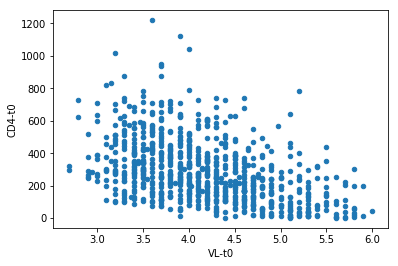

In [52]:
positive.plot(kind='scatter', x='VL-t0', y='CD4-t0')
plt.show()

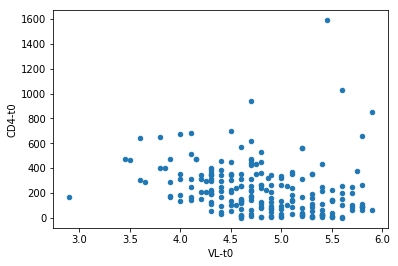

In [59]:
negative.plot(kind='scatter',x='VL-t0', y='CD4-t0' )
plt.show()

In [33]:
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

In [14]:
feature_cols=['VL-t0']
X=train[feature_cols]
y=train.Resp

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=2)

In [16]:
log=LogisticRegression()

In [17]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred=log.predict(X_test)
y_prob=log.predict_proba(X_test)[:,1]

In [19]:
print(metrics.accuracy_score(y_test, y_pred))

0.796


In [22]:
print(metrics.confusion_matrix(y_test, y_pred))

[[199   1]
 [ 50   0]]


In [23]:
print(metrics.roc_auc_score(y_test, y_prob))

0.7473


In [24]:
print(metrics.log_loss(y_test, y_prob))

0.4455889718374326


In [25]:
print(log.score(X_train, y_train))

0.792


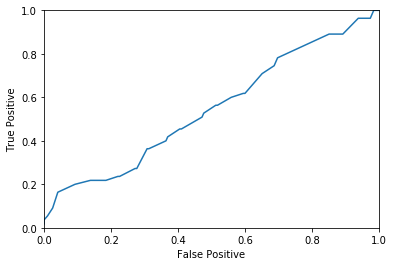

In [64]:
fpr, tpr, thresholds=metrics.roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()

In [26]:
print(log.intercept_)

[-5.31963739]


In [30]:
log.score(X_test, y_test)

0.796

In [32]:
log.score(X_test, y_pred)

1.0

In [34]:
svc=SVC()

In [35]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
print(metrics.accuracy_score(y_test, y_pred))

0.796


In [38]:
print(svc.score(X_train, y_train))

0.792


In [39]:
feature_col=['CD4-t0']
X=train[feature_col]
y=train.Resp

In [40]:
logr=LogisticRegression()

In [41]:
logr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=5)

In [43]:
y_pred=logr.predict(X_test)

In [44]:
print(metrics.accuracy_score(y_test, y_pred))

0.78


In [45]:
print(metrics.confusion_matrix(y_test, y_pred))

[[195   0]
 [ 55   0]]


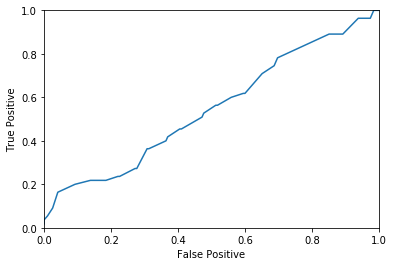

In [63]:
fpr, tpr, thresholds=metrics.roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()

In [46]:
feature_coll=['VL-t0','CD4-t0']
X=train[feature_coll]
y=train.Resp

In [47]:
logrr=LogisticRegression()

In [49]:
logrr.fit(X_test, y_test)
y_pred=logrr.predict(X_test)

In [50]:
print(metrics.accuracy_score(y_test, y_pred))

0.78


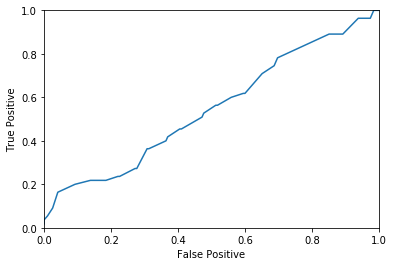

In [62]:
fpr, tpr, thresholds=metrics.roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()